In [4]:
import pandas as pd
import numpy as np

In [44]:
messages=pd.read_csv('EmailSpam.txt',sep='\t', names=["label","message"])

In [45]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [48]:
messages['len']=messages['message'].apply(len)

In [50]:
messages.head()

,label,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [51]:
import seaborn as sns

In [54]:
%matplotlib inline

C:\ML\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


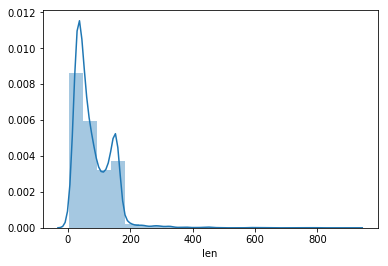

In [62]:
sns.distplot(messages['len'], kde=True,hist=True,bins=20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000287CD6C5CC0>,
      dtype=object)

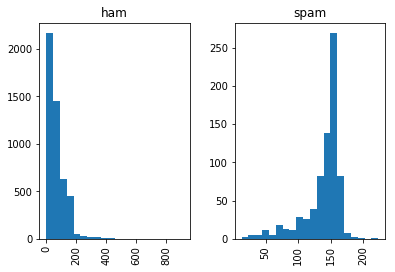

In [63]:
messages.hist(column='len',by='label',bins=20)

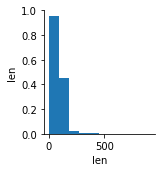

In [64]:
sns.pairplot(data=messages)

In [70]:
import string


In [71]:
mess="Selenim ! @ Demo automation machine leanring & Hello ,"

In [79]:
nopunc=[char for char in mess if char not in string.punctuation]

nopunc=''.join(nopunc)

nopunc

'Selenim   Demo automation machine leanring  Hello '

In [85]:
import nltk

In [95]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sathvi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [96]:
from nltk.corpus import stopwords

In [97]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [108]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [109]:
clean_mess

['Selenim', 'Demo', 'automation', 'machine', 'leanring', 'Hello']

In [110]:
def test_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [139]:
mes=messages['message'].apply(test_process)


(5572,)

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
bow_transformer=CountVectorizer(analyzer=test_process).fit(messages['message'])

In [122]:
len(bow_transformer.vocabulary_)

11425

In [123]:
messages4=messages['message'][3]

In [124]:
messages4

'U dun say so early hor... U c already then say...'

In [126]:
bow4=bow_transformer.transform([messages4])

In [128]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [131]:
print(bow_transformer.get_feature_names()[9554])
print(bow_transformer.get_feature_names()[4068])

say
U


In [137]:
messages_bow=bow_transformer.transform(messages['message'])

In [141]:
messages_bow.shape

(5572, 11425)

In [144]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer =TfidfTransformer().fit(messages_bow)

ifidf4=tfidf_transformer.transform(bow4)
print(ifidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [145]:
messages_tfid=tfidf_transformer.transform(messages_bow)

In [146]:
messages_tfid.shape

(5572, 11425)

In [149]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(messages_tfid,messages['label'])

In [152]:
print('pridicted', spam_detect_model.predict(ifidf4)[0])
print('expectd:', messages.label[3])

pridicted ham
expectd: ham
